In [2]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import umap.umap_ as umap
import warnings
from sklearn.metrics import silhouette_score
import matplotlib
import matplotlib.pyplot as plt

In [3]:
base_path = "/auto/grad_space/zihend1/scENCORE/Change_Resolution/1000K/"

In [6]:
condition = "3_CON"
cell_type_list = ["Ast", "End", "Exc", "Inh", "Mic", "Olig", "OPC"]
meta_number_list = [20, 50, 100, 150, 200]

3_CON Ast 200 metacell
128
0.2273572
0.90365344


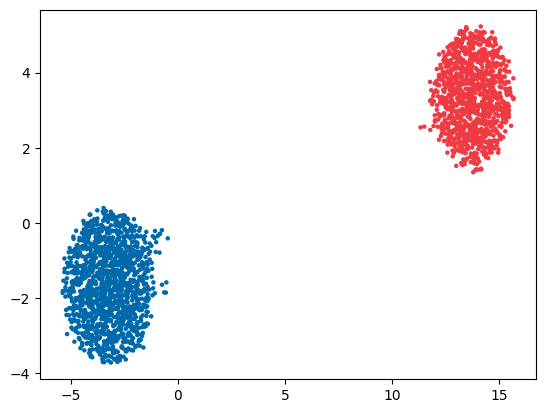

3_CON End 200 metacell
128
0.17316793
0.8588021


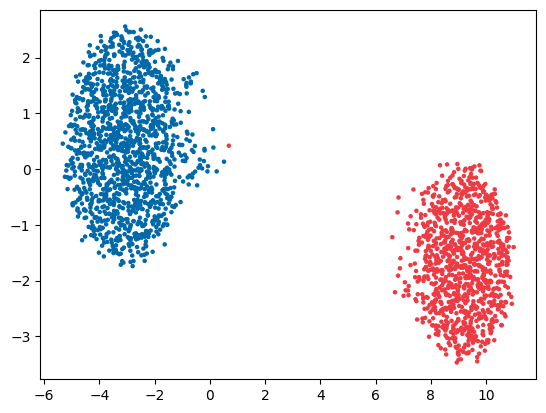

3_CON Exc 200 metacell
128
0.09159401
0.6655176


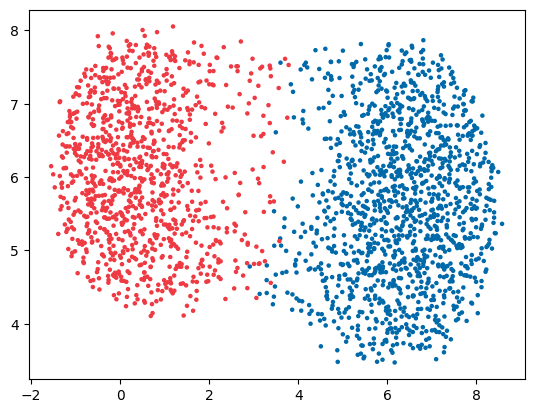

3_CON Inh 200 metacell
128
0.061265722
0.5358333


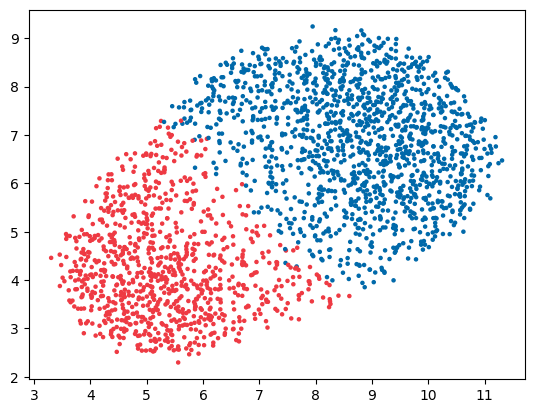

3_CON Mic 200 metacell
128
0.14323121
0.7969337


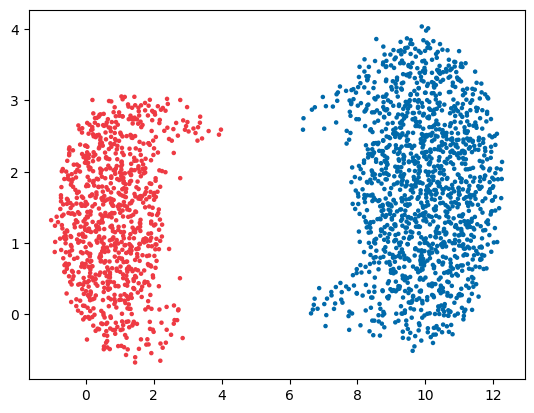

3_CON Olig 200 metacell
128
0.18260933
0.86019343


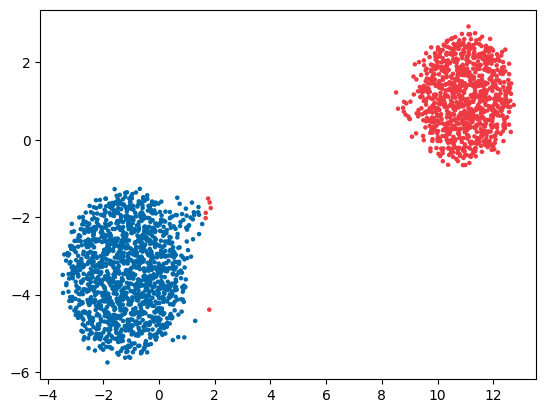

3_CON OPC 200 metacell
128
0.18467396
0.8692468


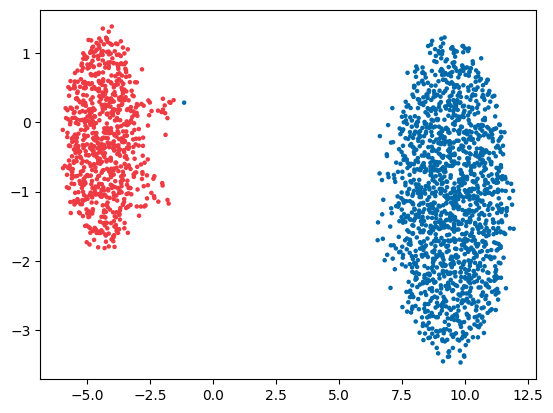

In [9]:
meta_path = "/lv_scratch/scratch/share/scENCORE_brain/3_good_CON_brain/Metacells_n/"

meta_number = meta_number_list[4]

for cell_type in cell_type_list:

    print(condition+" "+cell_type+" "+str(meta_number)+" metacell")
    
    embedding_size=128
    embedding = np.load(base_path+condition+"/cell_type/"+cell_type+"/"+str(meta_number)+"_metacell/Embedding/corr_0_1_VERSE_"+str(embedding_size)+".npy")
    adata = ad.AnnData(embedding)
    sc.pp.neighbors(adata, n_neighbors=100, use_rep='X')
    sc.tl.leiden(adata,resolution=0.3)
    sc.tl.umap(adata)
    print(embedding_size)
    print(silhouette_score(X=embedding, labels=adata.obs['leiden']))
    print(silhouette_score(X=adata.obsm['X_umap'], labels=adata.obs['leiden']))
#     sc.pl.umap(adata, color='leiden')
    abclass = np.array(adata.obs['leiden'])
    color_list = []
    for i in range(len(adata.obs['leiden'])):
        if (adata.obs['leiden'][i]) == '0':
            color_list.append('#0069aa')
        else:
            color_list.append('#ee3a43')
    pos = np.array(adata.obsm['X_umap'])
    plt.scatter(pos[:2359,0], pos[:2359,1], c=color_list[:2359], s=5, marker="o")
    plt.savefig("./figure/"+condition+"_"+cell_type+"_"+str(meta_number)+"_metacell"+"_umap.eps",dpi=300,format='eps')
    plt.show()